# Visualization/Exploration

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import data
data = pd.read_csv("cleaned_data.csv")
data.head()

C:\Users\Gian\AppData\Local\Temp\ipykernel_20596\906520572.py:8: DtypeWarning: Columns (21,22,36,37,46,47,48,49,50,51,52,53,54,56,110,111,112,117) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_data.csv")


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,...,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Northern Indiana Commuter Transportation District,2017.0,N1700013,17.0,6.0,NaN,NaN,NaN,NaN,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,...,NaN,NaN,NaN,NaN,NaN,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned
1,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,2017.0,201707188,17.0,6.0,Northern Indiana Commuter Transportation District,N1700013,17.0,6.0,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,...,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,Northern Indiana Commuter Transportation District,Not Assigned,Passenger (Formerly Commuter),Class 3,SMT-4 - CP/CN/CCD,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned
2,Conrail,1981.0,0420001,81.0,4.0,NaN,NaN,NaN,NaN,Conrail,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 3,NaN,Consolidated Rail Corporation,Not Assigned
3,Illinois Central Railroad Company,2007.0,543854,7.0,1.0,NaN,NaN,NaN,NaN,Cargill Elevator,...,NaN,NaN,NaN,NaN,NaN,Shippers,Class 3,NaN,Cargill Elevator,Not Assigned
4,Illinois Central Railroad Company,2017.0,938223,17.0,10.0,NaN,NaN,NaN,NaN,Illinois Central Railroad Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-4 - CP/CN/CCD,Canadian National - North America,Canadian National - North America


## Data Visualization

### Accidents Per Year

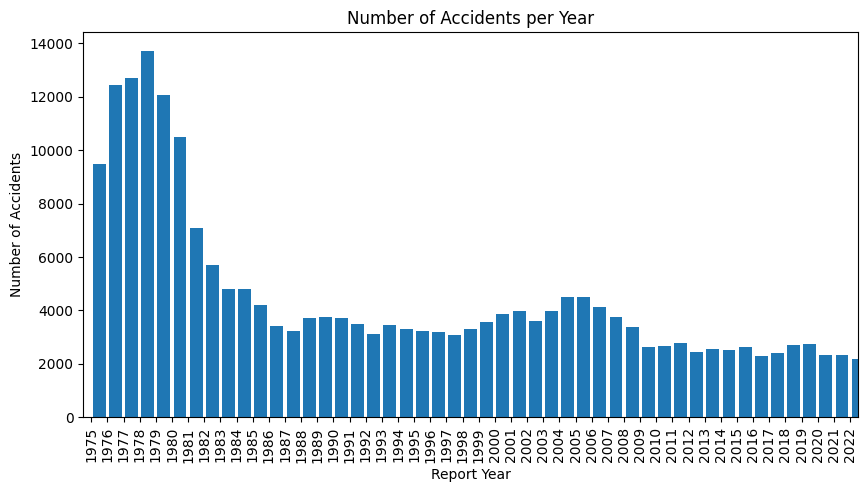

In [2]:
# find number of NA for Report Year
min_year = int(data['Report Year'].min())
max_year = int(data['Report Year'].max())
plt.figure(figsize=(10, 5))
plt.xlim(min_year - 0.5, max_year + 0.5)
plt.hist(data['Report Year'], bins=range(min_year, max_year + 2), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 1))
plt.xticks(rotation=90)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.show()

### Accidents Per Company

Companies with incident counts < 3000 were grouped for an interpretable chart.

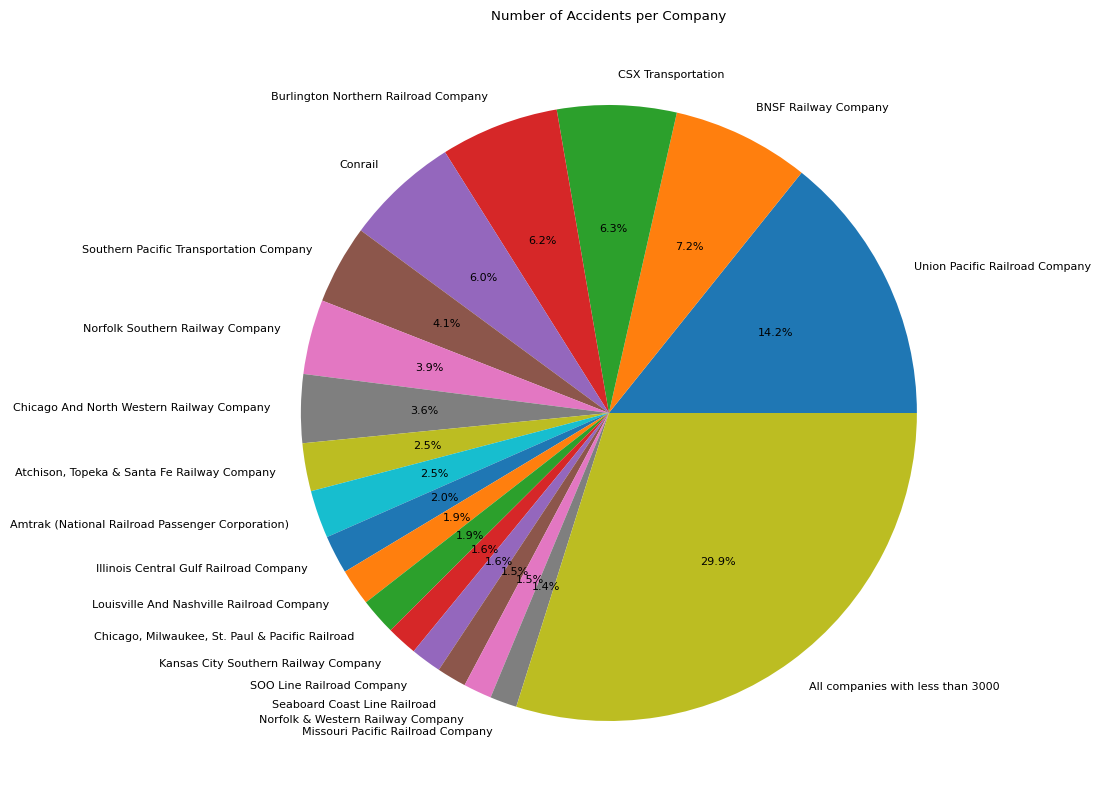

In [3]:
# Pie plot showing number of accidents per company
# Group all companies with less than 500 accidents into "Other"
plt.figure(figsize=(10, 10))
companies = data['Reporting Railroad Name'].value_counts()
companies['All companies with less than 3000'] = companies[companies < 3000].sum()
companies = companies[companies > 3000]
# make text smaller
matplotlib.rcParams.update({'font.size': 8})
plt.pie(companies, labels=companies.index, autopct='%1.1f%%')
plt.title('Number of Accidents per Company')
plt.show()

In [4]:
#Looking At Companies
print(companies)

Union Pacific Railroad Company                      30739
BNSF Railway Company                                15574
CSX Transportation                                  13503
Burlington Northern Railroad Company                13414
Conrail                                             12897
Southern Pacific Transportation Company              8957
Norfolk Southern Railway Company                     8468
Chicago And North Western Railway Company            7760
Atchison, Topeka & Santa Fe Railway Company          5434
Amtrak (National Railroad Passenger Corporation)     5421
Illinois Central Gulf Railroad Company               4349
Louisville And Nashville Railroad Company            4154
Chicago, Milwaukee, St. Paul & Pacific Railroad      4145
Kansas City Southern Railway Company                 3491
SOO Line Railroad Company                            3485
Seaboard Coast Line Railroad                         3345
Norfolk & Western Railway Company                    3211
Missouri Pacif

#### Box and Whisker of Accidents Per Company

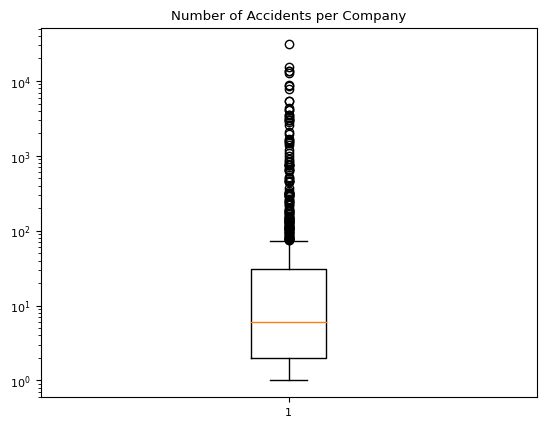

In [5]:
# box and whisker plot of accidents per company
companies = data['Reporting Railroad Name'].value_counts()
plt.boxplot(companies)
plt.title('Number of Accidents per Company')
plt.yscale('log')
plt.show()

#### Accidents Per Year for Conrail

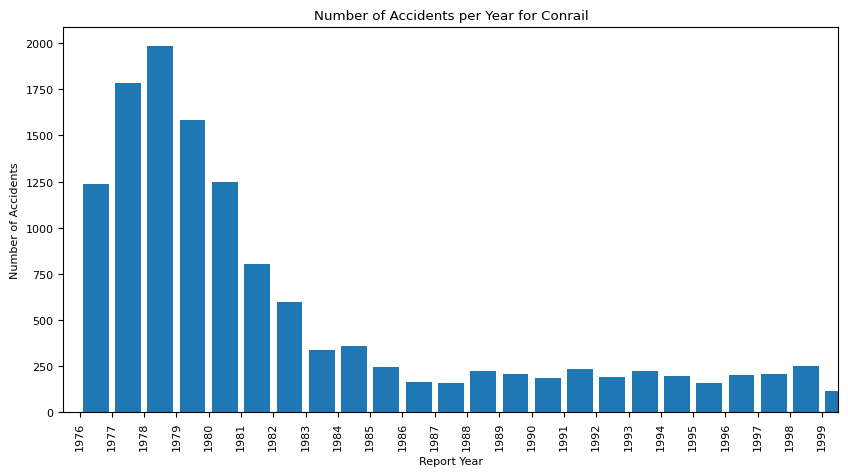

In [6]:
conrail = data[data['Reporting Railroad Name'] == 'Conrail']
min_year = int(conrail['Report Year'].min())
max_year = int(conrail['Report Year'].max())
plt.figure(figsize=(10, 5))
plt.xlim(min_year - 0.5, max_year + 0.5)
plt.hist(conrail['Report Year'], bins=range(min_year, max_year + 2), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 1))
plt.xticks(rotation=90)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year for Conrail')
plt.show()

### Accidents Per Month

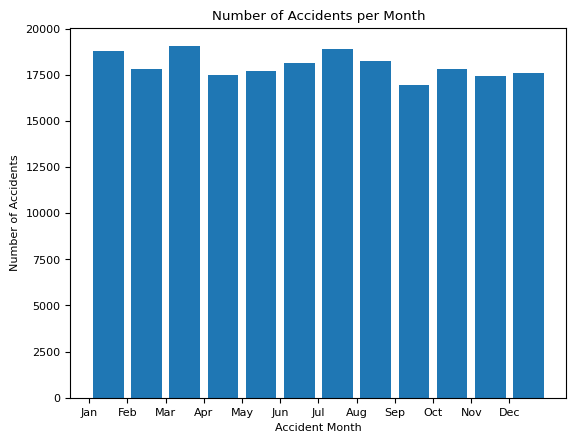

In [7]:
# Accident month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.hist(data['Accident Month'], bins=range(1, 14), rwidth=0.8)
plt.xlabel('Accident Month')
plt.xticks(range(1, 13), months)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.show()

### Accidents by Latitude and Longitude

In [17]:
# get data head for longitude and latitude
data[['Longitude', 'Latitude']].head()
data_long_lat = data[['Longitude', 'Latitude']]
data_long_lat = data_long_lat.dropna()
# remove all with 0
data_long_lat = data_long_lat[(data_long_lat.T != 0).any()]
# Removing outliers with z-score > 4
data_long_lat = data_long_lat[(np.abs(stats.zscore(data_long_lat)) < 4).all(axis=1)]
# add Accident Type back in
data_long_lat = pd.concat([data_long_lat, data['Accident Type']], axis=1)
# find unique accident types
accident_types = data_long_lat['Accident Type'].unique()
print(accident_types)

['Derailment' 'Hwy-rail crossing' 'Obstruction'
 'Other (describe in narrative)' 'Raking collision' 'Other impacts'
 'Fire/violent rupture' 'Head on collision' 'Side collision'
 'Rear end collision' 'Broken train collision' 'RR grade crossing' nan
 'Explosion-detonation']


16 7.16


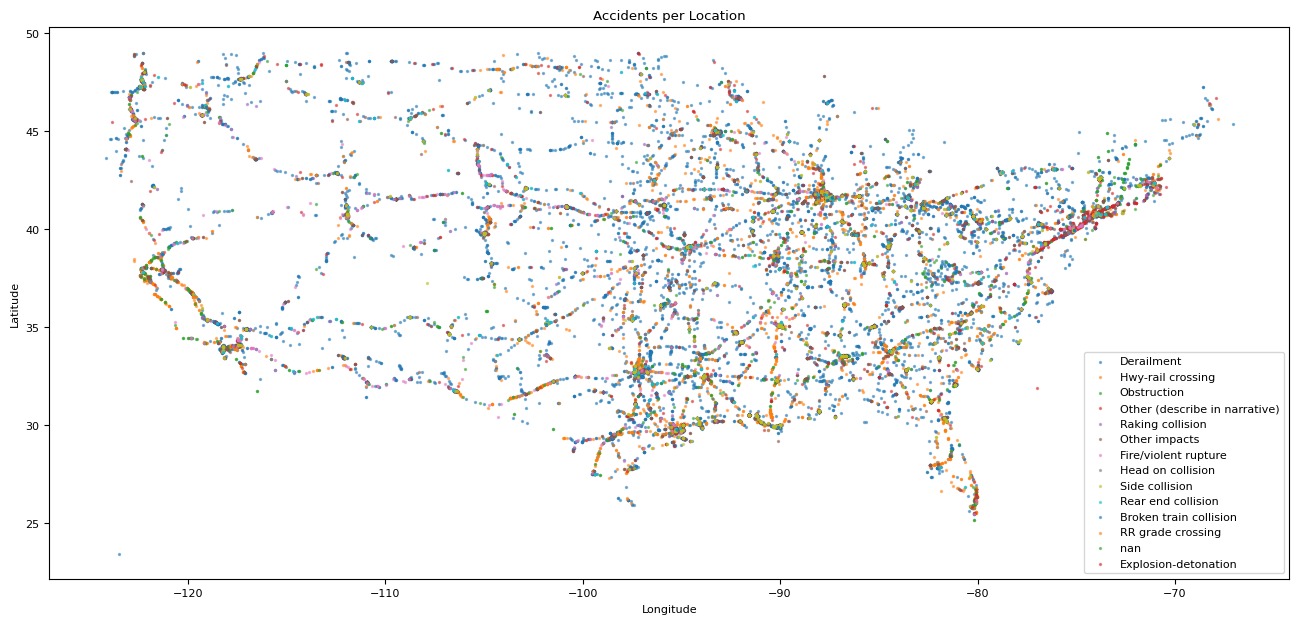

In [25]:
# find max and min of long and lat in order to find the proper figure size so that the plot isn't squished
long_max = data_long_lat['Longitude'].max()
long_min = data_long_lat['Longitude'].min()
lat_max = data_long_lat['Latitude'].max()
lat_min = data_long_lat['Latitude'].min()
div = (long_max - long_min) / (lat_max - lat_min)
width = 16
height = width / div
print(width, round(height,2))
plt.figure(figsize=(width, height))
# make color based on Accident Type
# plt.scatter(data_long_lat['Longitude'], data_long_lat['Latitude'], s=0.2)
for accident_type in accident_types:
    plt.scatter(data_long_lat[data_long_lat['Accident Type'] == accident_type]['Longitude'], data_long_lat[data_long_lat['Accident Type'] == accident_type]['Latitude'], s=2, alpha = 0.5, label=accident_type)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents per Location')
plt.legend()
# save to file
plt.savefig('accidents_per_location.png', dpi=1000)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


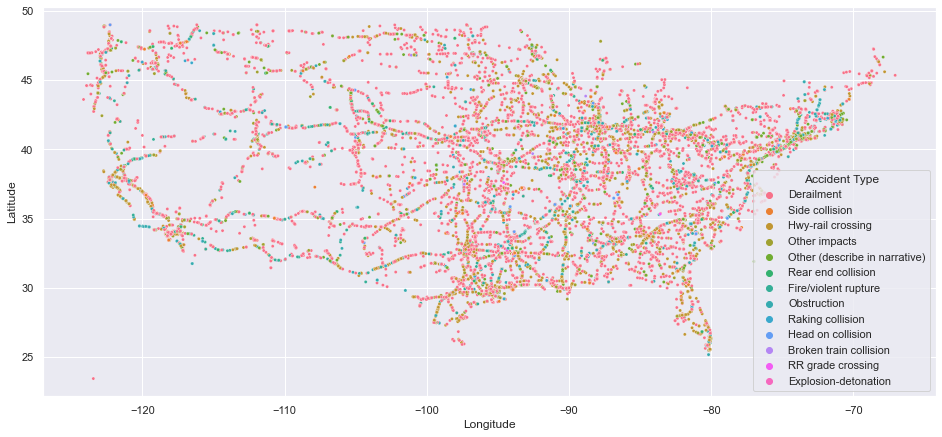

In [39]:
'''colors = {'Derailment':(1,0,0,.5), 'Side collision':(1, .9, 3, .5), 'Hwy-rail crossing':(0, 1, 0, .5), 'Other impacts':(1, .9, 3, .5),
 'Other (describe in narrative)':(.5,.5,.5, .5), 'Rear end collision':(1, .9, 3, .5),
 'Fire/violent rupture':(1, .5, 0, .5), 'Obstruction':'purple', 'Raking collision':(1, .9, 3, .5),
 'Head on collision':(1, .9, 3, .5), 'Broken train collision':(1, .9, 3, .5), 'RR grade crossing':(0, 1, 0, .5),
 'Explosion-detonation':(0,0,0,.5)}

plt.figure(figsize=(width, height))
plt.scatter(data=data_long_lat, x='Longitude', y='Latitude', s=0.2, c ='Accident Type'.map(colors))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents per Location')
plt.show()'''

sns.scatterplot('Longitude', 'Latitude', data=data_long_lat, hue='Accident Type', s=10)
sns.set(rc={'figure.figsize':(width,height)})

plt.show()

### Passengers Killed Per Accident

Accidents with 0 deaths removed for this visualization since they heavily outnumber those with deaths. This is just a look at a distrubution of deaths per accident for accidents with deaths occuring.

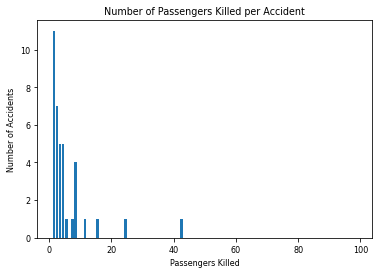

In [13]:
# plot of Passengers Killed
data['Passengers Killed'].describe()
pk = data['Passengers Killed']
pk = pk[pk > 0]
plt.hist(pk, bins=range(1, 100, 1), rwidth=0.8)
plt.xlabel('Passengers Killed')
plt.ylabel('Number of Accidents')
plt.title('Number of Passengers Killed per Accident')
plt.show()


### Number of Accidents by Accident Type 

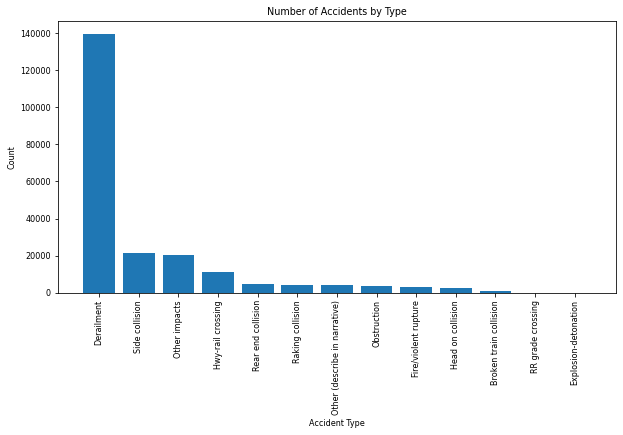

In [48]:
#Cause of Accidents/Initial Accident
accident_type = data['Accident Type'].value_counts()
#print(accident_type.index)
plt.figure(figsize=(10, 5))
plt.bar(accident_type.index,accident_type[:])
plt.xticks(rotation='vertical')
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.title("Number of Accidents by Type")
plt.show()
